# Linear Regression in TensorFlow

In [22]:
# Use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' 

In [23]:
import tensorflow as tf

In [24]:
print('TensorFlow version: %s' % tf.__version__)

TensorFlow version: 1.15.0


In [25]:
tf.enable_eager_execution()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

In [27]:
%matplotlib inline

In [28]:
np.random.seed(456)

In [29]:
tf.set_random_seed(456)

In [30]:
def pearson_r2_score(y, y_pred):
    """Computes Pearson R^2 (square of Pearson correlation)."""
    return pearsonr(y, y_pred)[0]**2

In [31]:
def rms_score(y_true, y_pred):
    """Computes RMS error."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [32]:
# Generate synthetic data
N = 100
w_true = 5
b_true = 2
noise_scale = .1

In [33]:
x_np = tf.random.uniform([N, 1])
noise = tf.random.normal([N, 1], stddev=noise_scale)
y_np = w_true * x_np + b_true + noise

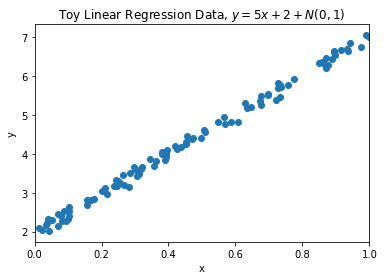

In [34]:
# Save image of the data distribution
plt.scatter(x_np.numpy(), y_np.numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.title("Toy Linear Regression Data, "
          r"$y = 5x + 2 + N(0, 1)$")
plt.savefig("lr_data.png")

In [35]:
W = tf.Variable(tf.random_normal([1, 1]))
b = tf.Variable(tf.random_normal([1,]))
print('W = %f, b = %f' % (W.numpy(), b.numpy()) )

W = -0.901485, b = 0.854242


In [36]:
optimizer = tf.train.AdamOptimizer()

In [37]:
n_steps = 12000

for i in range(n_steps):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(x_np, W) + b
        l = tf.reduce_sum((y_np - y_pred)**2)
        
        grads = tape.gradient(l, (W, b) )
        optimizer.apply_gradients(zip(grads, (W, b)))
        
        if i % 500 == 0:
            print('step(%d): loss = %f' % (i, l) )

step(0): loss = 1780.747681
step(500): loss = 1245.315063
step(1000): loss = 845.820801
step(1500): loss = 556.800476
step(2000): loss = 356.603302
step(2500): loss = 226.067596
step(3000): loss = 147.558640
step(3500): loss = 104.666351
step(4000): loss = 82.827446
step(4500): loss = 70.759789
step(5000): loss = 61.661999
step(5500): loss = 52.795929
step(6000): loss = 43.710075
step(6500): loss = 34.728096
step(7000): loss = 26.320217
step(7500): loss = 18.913969
step(8000): loss = 12.811761
step(8500): loss = 8.149307
step(9000): loss = 4.891195
step(9500): loss = 2.854350
step(10000): loss = 1.752921
step(10500): loss = 1.262359
step(11000): loss = 1.094082
step(11500): loss = 1.053311


In [38]:
print('W = %f, b = %f' % (W.numpy(), b.numpy()) )

W = 5.042699, b = 1.988452


In [39]:
w_final, b_final = W.numpy(), b.numpy()

In [40]:
y_pred_np = w_final * x_np + b_final

In [41]:
r2 = pearson_r2_score( np.reshape(y_np.numpy(), -1), np.reshape(y_pred_np, -1) )
print("Pearson R^2: %f" % r2)

Pearson R^2: 0.995081


In [42]:
rms = rms_score(y_np, y_pred_np)
print("RMS: %f" % rms)

RMS: 0.102325


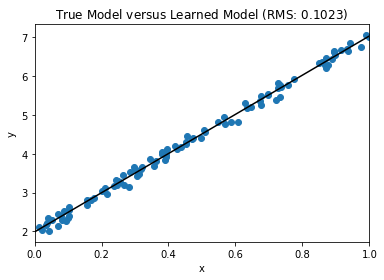

In [43]:
# Clear figure
plt.clf()
plt.xlabel("Y-true")
plt.ylabel("Y-pred")
plt.title("Predicted versus True values "
          r"(Pearson $R^2$: $" + str("%.4f" % r2) + "$)")
plt.scatter(y_np, y_pred_np)
plt.savefig("lr_pred.png")

# Now draw with learned regression line
plt.clf()
plt.xlabel("x")
plt.ylabel("y")
plt.title("True Model versus Learned Model "
          r"(RMS: $" + str( "%.4f" % rms) + "$)")
plt.xlim(0, 1)
plt.scatter(x_np, y_np)
x_left = 0
y_left = w_final[0]*x_left + b_final
x_right = 1
y_right = w_final[0]*x_right + b_final
plt.plot([x_left, x_right], [y_left, y_right], color='k')
plt.savefig("lr_learned.png")